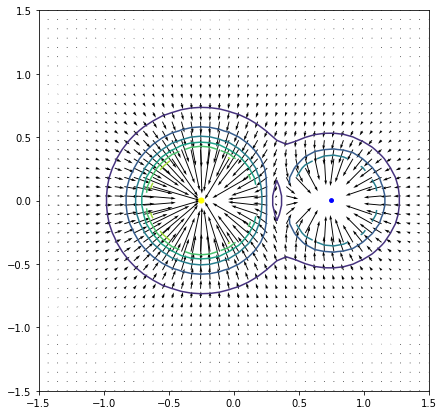

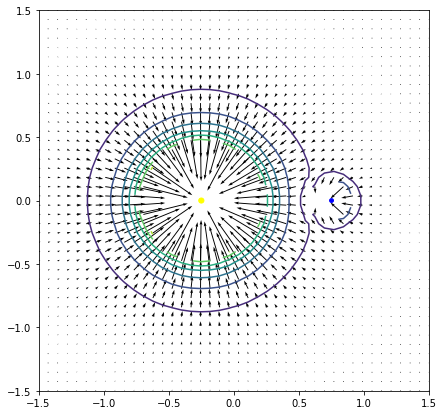

In [1]:
# Swapnil Dubey
# Astro 410 
# Homework 1 - Python Code


import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.numeric import NaN
from pylab import *


def Question123(Mstar, Mplanet, d):
    # Setting up x-y grid
    x = np.linspace(-1.5,1.5,42)
    y = np.linspace(-1.5,1.5,42)
    objposX, objposY = np.meshgrid(x,y)

    G = -1
    # Mplanet = 1
    # Mstar = 100*Mplanet
    # M3  = 1
    # d = 1

    #star location will not be array since it is static at a signle co-ordinate
    starlocX = - d / 2 + 1/4
    planetlocX = d / 2 + 1/4
    Yloc, planetlocY, starlocY = 0, 0, 0

    # Compute the magnitude square of the distance from m1 and m2
    r2planetX = objposX - planetlocX
    r2planetY = objposY - planetlocY
    r2planet = r2planetX**2 + r2planetY**2

    r2starX = objposX - starlocX
    r2starY = objposY - starlocY
    r2star = r2starX**2 + r2starY**2

    # Since the acceleration formula is G*M/r**2 there is no need to sqrt above magnitude
    gplanet = G*Mplanet/r2planet
    gstar = G*Mstar/r2star
    
    # Removing acceleration values near masses to avoid singularity
    if (Mstar/Mplanet) >= 70:
        remove_radiiP = 0.02
        remove_radiiS = 0.2
    else:
        remove_radiiP = 0.1
        remove_radiiS = 0.15

    gplanet[r2planet < remove_radiiP] = NaN
    gstar[r2star < remove_radiiS] = NaN

    # Cos theta = Adj / Hyp, Sin theta = Opp / Hyp
    Pcostheta = r2planetX / r2planet
    Psintheta = r2planetY / r2planet

    Scostheta = r2starX / r2star
    Ssintheta = r2starY / r2star

    # Projecting acceleration in X and Y axis for the vector plot
    gX = (gplanet*Pcostheta + gstar*Scostheta)
    gY = (gplanet*Psintheta + gstar*Ssintheta)

    # Plotting contour using acceleration
    Z = np.sqrt(gX**2 + gY**2)

    # Setting Plot size
    fig, ax = plt.subplots(figsize = (7,7))

    # Plots
    ax.quiver(objposX, objposY, gX, gY)
    ax.contour(x, y, Z)
    ax.add_patch(plt.Circle((planetlocX, planetlocY), 0.015, color='blue'))
    ax.add_patch(plt.Circle((starlocX, starlocY), 0.02, color='yellow'))

    plt.show()

# Input of our functions are => Mass of star, Mass of Planet, 
# and the seperation between them
Question123(3, 1, 1)
Question123(100, 1, 1)